# First try

In [6]:
import numpy as np
import matplotlib.pyplot as plt    

def pdf(v, sigma):
    return 1/ np.sqrt(2*np.pi*sigma) * np.exp(- np.abs(v)**2 / (2* sigma**2))

In [7]:
sigma = 270 # km/s

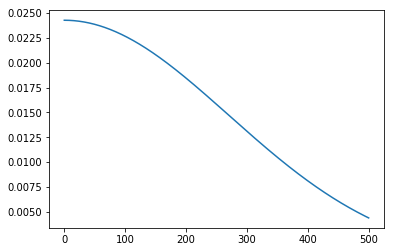

In [8]:
v_range = np.linspace(0,500, 1000)
plt.plot(v_range, [pdf(v, sigma) for v in v_range])
plt.show()